## Del 2 - Statistik dataanalys i Python

”Data storytelling” kan definieras enligt följande: ”Data storytelling is the concept of building a 
compelling narrative based on complex data and analytics that help tell your story and influence 
and inform a particular audience.” 

• I din kod ska du först ha en kort bakgrund som förklarar vad som görs i ”jupyter 
notebooken”.  
• Därefter gör du tillhörande dataanalys och förklarar vad som kan ses från analysen. 
Använd dig av beräkningar och visualiseringar.  
• Slutligen presenterar du huvudinsikterna och vilka rekommendationer du ger i en 
”executive summary”. 

Notera, när ni gör er analys är ni fria att specificera olika antaganden eller vilka infallsvinklar ni 
vill ha på er analys.   

De som satsar på VG behöver särskilt tänka på att lämna in en tydlig och konsistent ”Jupyter 
Notebook” där man kan följa med i progressionen och tankegången. Undvik alltså att göra 
extremt mycket beräkningar och visualiseringar utan ett tydligt syfte.  
 
Du kan välja ett av två dataset att analysera:  

1. Din vän och du är intresserade av att starta ett bilförsäljnings-företag. Innan ni gör det 
behöver ni förstå marknaden. Till er hjälp har ni ett dataset som ska analyseras.  
https://www.kaggle.com/datasets/asinow/car-price-dataset  
 
2. VD:n på företaget ”Nytto Maximerarna” säger ofta att personalen är företagets viktigaste 
resurs. Och denne ber därför dig, som kan statistik och dataanalys, analysera företagets 
personaldata. Vilka slutsatser samt rekommendationer kan du förmedla?  
https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-
analytics?resource=download  
 
 
 


# HR-Dataanalys för Nytto Maximerarna

Syftet med denna analys är att identifiera mönster och insikter i företagets personaldata för att stödja bättre beslut kring personalhantering, arbetsmiljö och retention. Analysen bygger på ett HR-dataset som innehåller information om bl.a. anställdas ålder, kön, avdelning, utbildningsnivå, lönenivå, arbetstillfredsställelse, antal år på företaget och om personen har lämnat företaget eller inte.

Frågeställningar:
- Vilka faktorer påverkar sannolikheten att en anställd lämnar företaget?
- Hur ser sambandet ut mellan arbetstillfredsställelse och arbetstider med personalomsättning?
- Hur ser sambandet ut mellan lönenivå och befodran med personalomsättning?


In [43]:
import pandas as pd
import sqlite3
import numpy as numpy
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns; sns.set_theme(font_scale=.75)
import scipy.stats as st

In [44]:
personal_data = pd.read_excel("/Users/AliceNguyen/Documents/Data Manager - TUC/(År 1.6) Statisk och dataanalys/HR_Employee_Data.xlsx")

In [45]:
df = personal_data

In [46]:
print(" Företagets statistik över anställda:")
print(df.describe())

 Företagets statistik över anställda:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%

# Översikt
- De flesta anställda har en medelhög tillfredsställelse (0.613).
- Snittarbetstid per månad är ~201 timmar, men vissa jobbar upp till 310 timmar!
- Anställda stannar på företaget i genomsnitt 3,5 år, men det finns också folk som jobba upp till 10 år på företaget. 
- 23.8% av de anställda har slutat.
- Endast 2.1% har fått befordran på 5 år, vilket kan påverka motivationen och hur anställda jobbar på företaget. 

# Anställda som slutar

In [47]:
anställda_som_slutar = df["left"].value_counts(normalize=True) * 100
print("Andel anställda som slutat:", anställda_som_slutar)


Andel anställda som slutat: left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


/var/folders/c4/r05x8f2951vf_0f51pj8pckm0000gp/T/ipykernel_90651/1718167024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="left", data=df, palette="pastel")


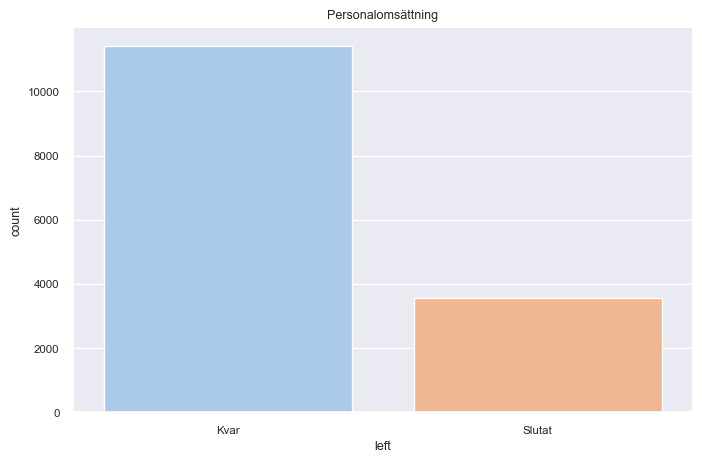

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x="left", data=df, palette="pastel")
plt.xticks(ticks=[0,1], labels=["Kvar", "Slutat"])  
plt.title("Personalomsättning")
plt.show()

Det är nästan 24% anställda som slutar och 76% som stannar kvar på företaget. 

# Påverkar arbetsnöjdhet och arbetstid om någon slutar?

/var/folders/c4/r05x8f2951vf_0f51pj8pckm0000gp/T/ipykernel_90651/2427357328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="satisfaction_level", data=df, palette="pastel")


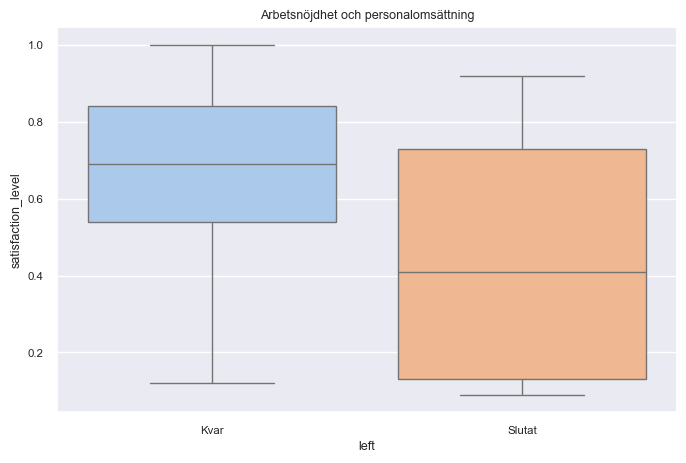

In [49]:
# Arbetsnöjdheet och personalomsättning
plt.figure(figsize=(8,5))
sns.boxplot(x="left", y="satisfaction_level", data=df, palette="pastel")
plt.xticks(ticks=[0,1], labels=["Kvar", "Slutat"])
plt.title("Arbetsnöjdhet och personalomsättning")
plt.show()

Statistik:

Medianen för de som har slutat är betydligt lägre än för de som är kvar.

=) Detta tyder på att anställda med lägre arbetsnöjdhet oftare slutar, vilket är en stark indikator på att arbetsmiljö och trivsel kan påverka personalomsättningen.

Bland de som är kvar finns några outliers med extremt låg arbetsnöjdhet.

=) Det betyder att vissa anställda stannar trots att de är mycket missnöjda. Möjliga orsaker kan vara ekonomisk osäkerhet, brist på alternativ, eller att de trivs med vissa aspekter av jobbet men inte andra.

Bland de som har slutat finns färre outliers.
=) Det kan betyda att beslutet att sluta är mer konsekvent bland missnöjda anställda – de flesta som är missnöjda lämnar.

Analys:

Låg arbetsnöjdhet är starkt kopplad till att anställda slutar.

=) För att minska personalomsättningen bör företaget identifiera orsakerna bakom missnöje (t.ex. arbetsbelastning, lön, ledarskap) och arbeta med förbättringar.

Det finns en grupp anställda som stannar trots låg nöjdhet.

=) Företaget kan genomföra enkäter eller intervjuer för att förstå vad som gör att de stannar och om det finns åtgärder som kan öka deras trivsel.


# Är arbetsnöjdhet normalfördelad?

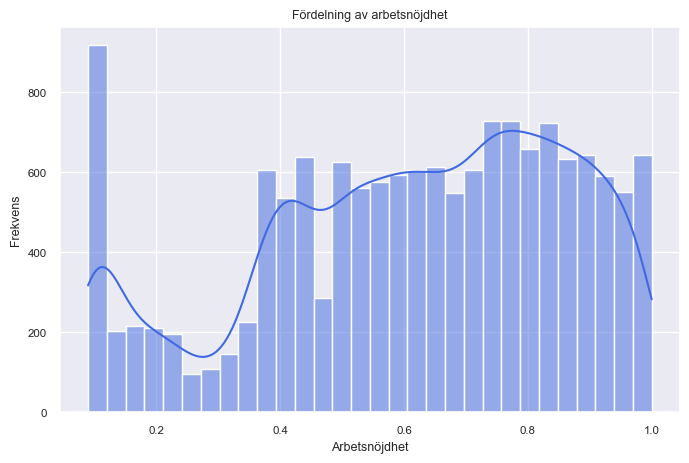

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df["satisfaction_level"], kde=True, bins=30, color="royalblue")
plt.title("Fördelning av arbetsnöjdhet")
plt.xlabel("Arbetsnöjdhet")
plt.ylabel("Frekvens")
plt.show()

Statistik:

Histogrammet visar att arbetsnöjdheten inte är normalfördelad

=) Fördelningen är inte symmetrisk och saknar den klassiska klockformen.

=) Det finns skevhet och flera toppar, vilket tyder på att det finns olika grupper av anställda med olika nivåer av nöjdhet.


/var/folders/c4/r05x8f2951vf_0f51pj8pckm0000gp/T/ipykernel_90651/4004541232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="average_montly_hours", data=df, palette="pastel")


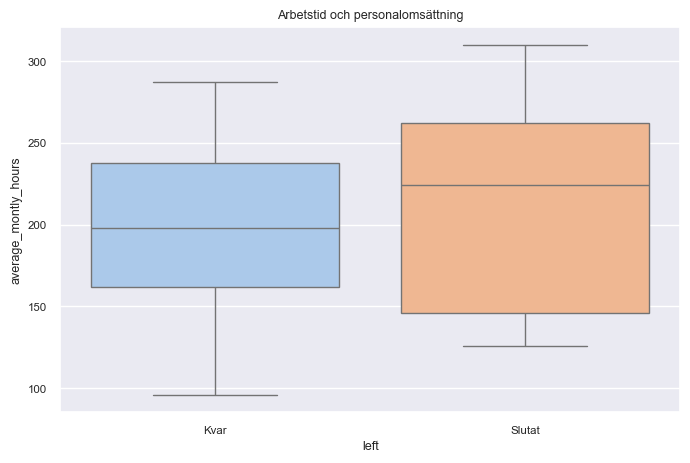

In [51]:
# Arbetstid och personalomsättning
plt.figure(figsize=(8,5))
sns.boxplot(x="left", y="average_montly_hours", data=df, palette="pastel")
plt.xticks(ticks=[0,1], labels=["Kvar", "Slutat"])
plt.title("Arbetstid och personalomsättning")
plt.show()

Statistik:

Median arbetstimmar för de som slutar är betydligt högre än de som stannar, ungefär 225 timmar per månad medans median arbetstimmar för dem som är kvar är lite mindre än 200 timmar.

=) Det tyder på att hög arbetsbelastning kan leda till hög personalomsättning.
=) Företaget bör undersöka övertidsarbete, stress och balans mellan jobb och fritid.

Det finns många outliers i gruppen som slutar. 

=) Detta visar på att vissa anställda jobbat extremt mycket innan de sa upp sig. Anledningen tll att de säger upp sig kan beror på utbrändhet.
=) Det finns också  de som jobbat extremt lite, vilket kan signalera brist på engagemang eller arbetsuppgifter.


Analys:

Extremt mycket arbetstimmarna per månad har en starkt koppling till anställda som säg upp sig. 

=) Företaget bör undersöka arbetsbelastning, stress och övertidspolicy.



#  Har lönenivå och befordran betydelse?



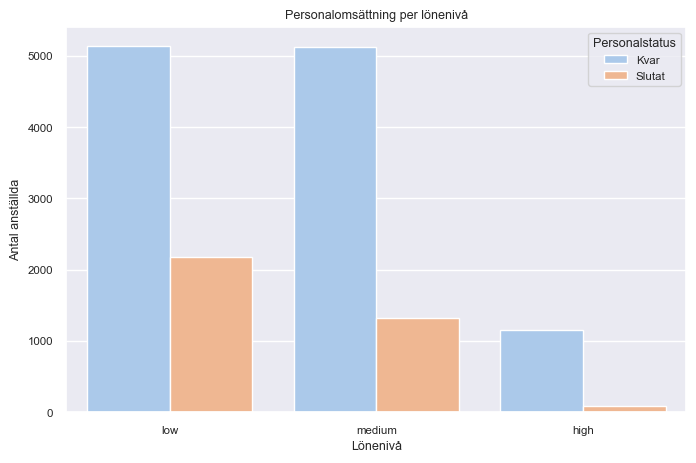

In [52]:
# lönenivå och personalomsättning

plt.figure(figsize=(8,5))

sns.countplot(x="salary", hue="left", data=df, palette="pastel")

plt.legend(title="Personalstatus", labels=["Kvar", "Slutat"])

plt.title("Personalomsättning per lönenivå")
plt.xlabel("Lönenivå")
plt.ylabel("Antal anställda")
plt.show()


Statistik:

Diagrammet visar att anställda med lägre löner tenderar att sluta oftare än dem med medium och hög lön

=) Högre personalomsättning i låglönegruppen jämfört med övriga kategorier.


Analys:

En tydlig koppling mellan anställda som slutar och låga lönerna. 

=) Lönen är inte tillräckligt konkurrenskraftig och anställda söker bättre betalda jobb.

=) Brist på karriärmöjligheter eller utveckling gör att de ser sig om efter nya alternativ.

=) Arbetsvillkoren kan vara mindre attraktiva i de lägre löneskikten.





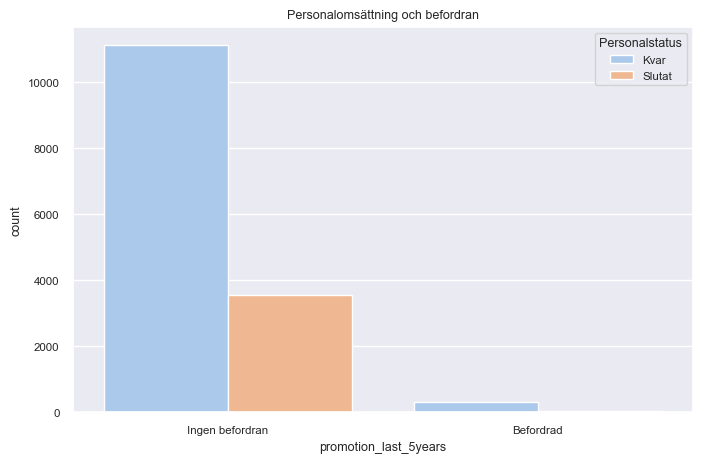

In [53]:
#Befordran och personalomsättning

plt.figure(figsize=(8,5))

sns.countplot(x="promotion_last_5years", hue="left", data=df, palette="pastel")

plt.legend(title="Personalstatus", labels=["Kvar", "Slutat"])

plt.xticks(ticks=[0,1], labels=["Ingen befordran", "Befordrad"])
plt.title("Personalomsättning och befordran")
plt.show()

Statistik:

Nästan inga som har blivit befordrade de senaste 5 åren har slutat
Nästan 4000 anställda som inte har blivit befordrade under samma period har lämnat företaget.

Analys:

Brist på karriärutveckling kan leda till att anställda söker sig till andra arbetsgivare.

Befordran ger anställda en känsla av erkännande och motivation att stanna kvar.

De som inte ser möjligheter till avancemang kan tappa engagemang och söka sig vidare.



### Executive summary


Denna analys av personaldata utgår från flera viktiga insikter som påverkar personalomsättningen och de anställdas välbefinnande. En tydlig koppling framträder mellan låg arbetsnöjdhet och en ökad benägenhet att sluta. Medianen för arbetsnöjdhet är signifikant lägre bland de som har lämnat företaget, vilket understryker vikten av en positiv arbetsmiljö och trivsel för att minska personalomsättningen.

Vidare indikerar statistiken att hög arbetsbelastning, mätt i arbetstimmar per månad, är en stark bidragande faktor till att anställda säger upp sig. Medianen för arbetstimmarna är betydligt högre för de som slutat jämfört med de som stannat, och förekomsten av extrema outliers bland de som slutat tyder på risk för utbrändhet.

Lönenivån spelar också en avgörande roll. Anställda i de lägre löneskikten har en betydligt högre tendens att sluta, vilket antyder att lönen inte är konkurrenskraftig eller att det saknas tillräckliga karriärmöjligheter och utveckling inom dessa grupper.

Slutligen framhäver analysen att bristen på karriärutveckling är en viktig faktor. Nästan inga anställda som har blivit befordrade under de senaste fem åren har slutat, medan en betydande andel av dem utan befordran har lämnat företaget. Detta understryker att möjligheter till avancemang och erkännande är viktiga för att behålla personal.

#### Rekommendationer till HR - avdelningen

Baserat på dessa insikter rekommenderas följande åtgärder:

Adressera arbetsnöjdheten: Genomför djupare undersökningar för att identifiera specifika orsaker till missnöje och implementera förbättringar i arbetsmiljö, ledarskap och andra relevanta områden.

Arbetsbelastningen: Undersök och optimera arbetsfördelningen för att minska risken för överbelastning och utbrändhet, särskilt bland de som arbetar flest timmar.

Utvärdera lönestrukturen: Jämför löner med marknaden och överväg justeringar, särskilt i de lägre löneskikten, för att öka konkurrenskraftigheten och minska personalomsättningen.

Förbättra karriärmöjligheterna: Skapa tydligare karriärvägar, öka antalet befordringar och implementera program för kompetensutveckling och erkännande för att öka motivation och lojalitet.

Genom att adressera dessa områden kan företaget sannolikt minska sin personalomsättning, öka de anställdas engagemang och i slutändan förbättra den övergripande produktiviteten och lönsamheten.
